# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 6 คาดการณ์รายได้ของลูกค้า

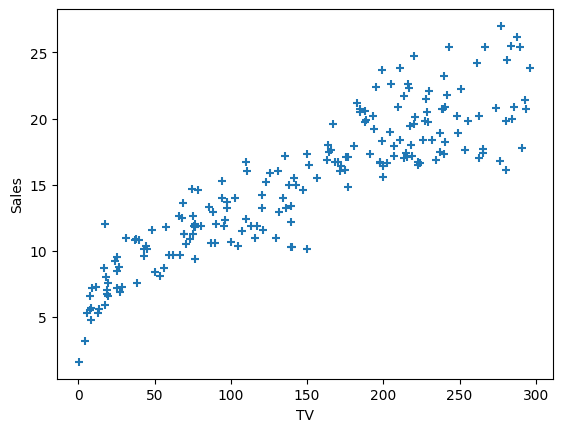

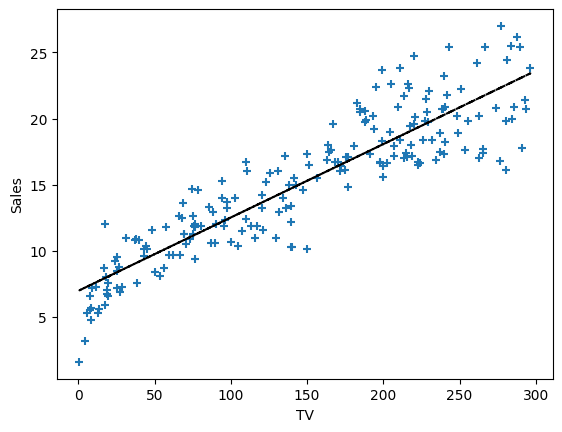

In [2]:
# ตัวอย่างที่ 6.1
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
advertising = pd.read_csv("data/advertising2.csv")
advertising.head(2)

# พล็อต ดูความสัมพันธ์ของสองตัวแปร
plt.scatter(advertising.TV, advertising.Sales, marker="+")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(advertising[['TV']], advertising[['Sales']])

# พล็อตเส้นถดถอย
sales_pred = lr.predict(advertising[['TV']])
sales_pred

plt.plot(advertising.TV, sales_pred,"k--")
plt.scatter(advertising.TV, advertising.Sales, marker='+')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

#### Plotting the relationship

In [5]:
sales_pred = lr.predict(advertising[['TV']])

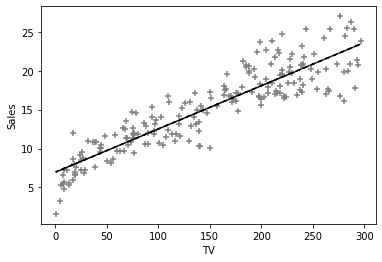

In [6]:
plt.plot(advertising.TV, sales_pred,"k--")
plt.scatter(advertising.TV, advertising.Sales, \
            marker='+', color='gray')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

In [14]:
# ตัวอย่างที่ 6.2
import pandas as pd
import datetime as dt
df = pd.read_csv('data/azra_retail_transactions.csv')
df.head()
df.info()

# แปลงคอลัมน์ InvoiceDate ให้เป็น date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()
# หารายได้ (revenue)
df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

# รวมหลายรายการซื้อในคำสั่งซื้อเดียวกัน (InvoiceNo) ไว้ในแถวเดียวกัน
operations = {'revenue':'sum','InvoiceDate':'first',
              'CustomerID':'first'}
df = df.groupby('InvoiceNo').agg(operations)
df.head()

# เพิ่มคอลัมน์ year
df['year'] = df['InvoiceDate'].dt.year

# คำนวณจำนวนวัน ระหว่างวันสุดท้ายของปี 2019 กับ วันที่ในใบแจ้งหนี้
df['days_since'] = (dt.datetime(year=2019, month=12, day=31) \
                    - df['InvoiceDate']).apply(lambda x: x.days)
df.head()

# จำนวนวันของการซื้อครั้งแรก ครั้งล่าสุด และจำนวนครั้งที่ซื้อ
operations = {'revenue':'sum',\
              'days_since':['max','min','nunique']}
X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)
X.head()

# เชื่อมต่อชื่อคอลัมน์ด้วยช่องว่าง
X.columns = [' '.join(col).strip() for col in X.columns.values]
X.head()

# ค่าเฉลี่ยการใช้จ่ายต่อคำสั่งซื้อ
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']
# ผลรวมของรายได้ในปี 2020
y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

# สร้าง DataFrame ใหม่
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2019',
                       'days_since_first_purchase',
                       'days_since_last_purchase',
                       'number_of_purchases',
                       'avg_order_cost',
                       'revenue_2020']
wrangled_df.head()

# drop ลูกค้าที่ไม่มีข้อมูล revenue_2019, revenue_2020
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

# ขั้นตอนสุดท้ายของ data-cleaning step คือกำจัด outliers
wrangled_df = wrangled_df[wrangled_df.revenue_2020 \
               < ((wrangled_df.revenue_2020.median()) \
               + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 \
              < ((wrangled_df.revenue_2019.median()) \
                 + wrangled_df.revenue_2019.std()*3)]
wrangled_df.head()

# บันทึกไฟล์
wrangled_df.to_csv('data/wrangled_transactions.csv')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


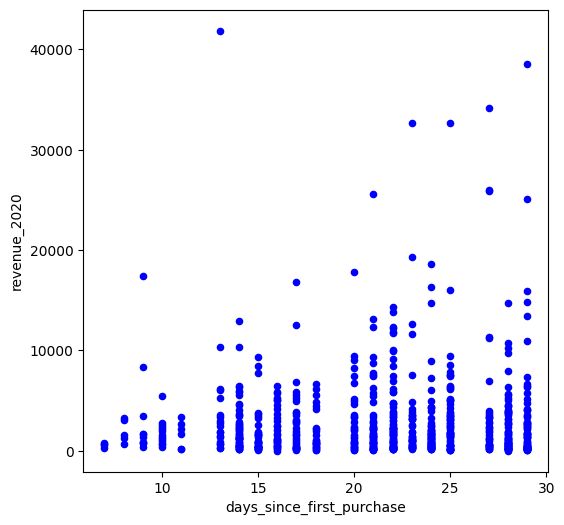

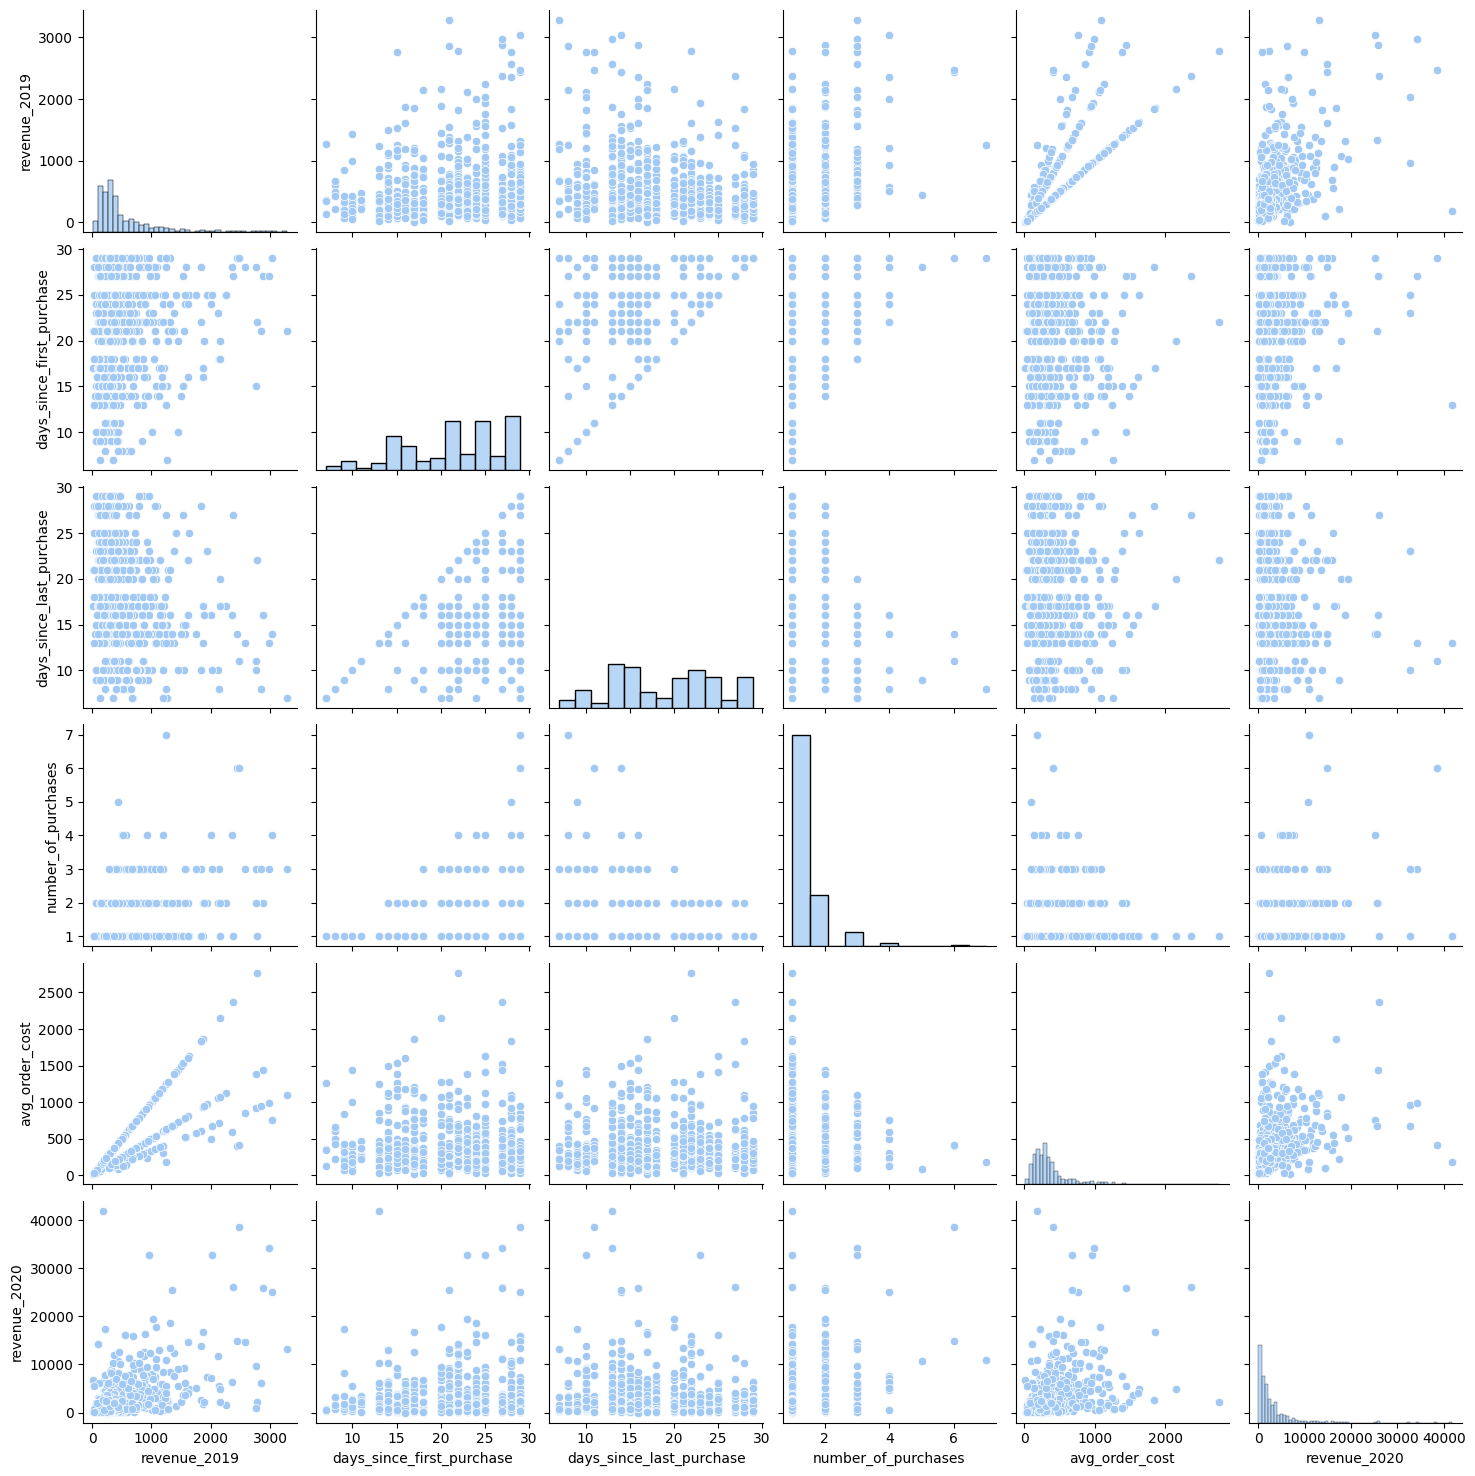

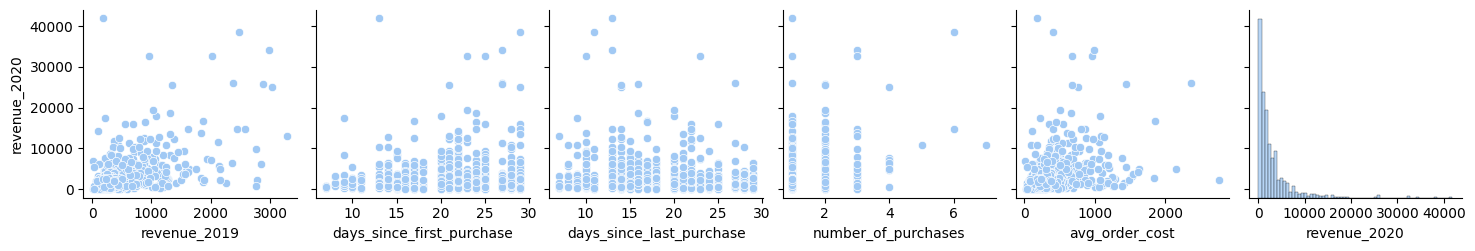

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [23]:
# ตัวอย่างที่ 6.3
import pandas as pd
df = pd.read_csv('data/wrangled_transactions.csv',
                 index_col='CustomerID')

# แผนภาพการกระจาย
import matplotlib.pyplot as plt
df.plot.scatter(x="days_since_first_purchase",
                y="revenue_2020",
                figsize=[6,6], color='blue')
plt.show()

# pairplot
import seaborn as sns
sns.set_palette('pastel')
sns.pairplot(df)
plt.show()

sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

# correlation
df.corr()

In [ ]:
# กิจกรรมที่ 6.1
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('location_rev.csv')
df.head()

df.plot.scatter("median_income", 'revenue', \
                figsize=[5,5], color='gray')
plt.show()

sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

sns.pairplot(df,x_vars=df.columns, y_vars="revenue")
plt.show()

df.corr()

In [35]:
# ตัวอย่างที่ 6.4
import pandas as pd
df = pd.read_csv('data/wrangled_transactions.csv',
                 index_col='CustomerID')
df.corr()

X = df[['revenue_2019','days_since_last_purchase',
        'number_of_purchases','avg_order_cost']]
y = df['revenue_2020']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 random_state = 100)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

model.coef_
model.intercept_

single_customer = pd.DataFrame({'revenue_2019': [1000],
                                'days_since_last_purchase': [20],
                                'number_of_purchases': [2],
                                'avg_order_cost': [500]})
model.predict(single_customer)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(model.predict(X_test), y_test, color='gray')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show();

import numpy as np
np.corrcoef(model.predict(X_test), y_test)

In [ ]:
# กิจกรรมที่ 6.2
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('data/location_rev.csv')
df.head()

X = df[['num_competitors','median_income','num_loyalty_members',
        'population_density','location_age']]
y = df['revenue']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 random_state = 100)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#Print out the model coefficients:
model.coef_
model.intercept_

single_location = pd.DataFrame({'num_competitors': [3],
                                'median_income': [30000],
                                'num_loyalty_members': [1200],
                                'population_density': [2000],
                                'location_age': [10]})
model.predict(single_location)

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')
plt.show()

np.corrcoef(model.predict(X_test), y_test)